# We used Keras deep learning library to build and test three different types of deep neural networks. First is the Densely connected neural network, the second is the Convolutional Neural Network CNN, and the third is  the Long Short Term Memory Network LSTM. 

In [1]:
# importing the python libraries

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

# Importing covid vaccine dataset.

In [2]:
Covid_reviews = pd.read_csv("C:\covid vaccine dataset (V2).csv")

Covid_reviews.isnull().values.any()

Covid_reviews.shape

(2134, 2)

In [3]:
# Reviewing the frist 4 columns 
Covid_reviews.head()

,review,sentiment
0,a worthwhile read on the prospects of covid19v...,positive
1,regardless of the election outcome not much wi...,positive
2,some good news in the fight against covid19 tc...,positive
3,there will be positive developments regarding ...,positive
4,how about the unfunded plan to distribute any ...,neutral


In [4]:
# Double checking the dataset
Covid_reviews["review"][3]

'there will be positive developments regarding the vaccine in december but the virus will continue in the 2021calendar with the vaccines covid19vaccine trumpvsbiden2020 corona trumpcovid19 healthylifestyle health healthandsafety astrology breakingnews now'

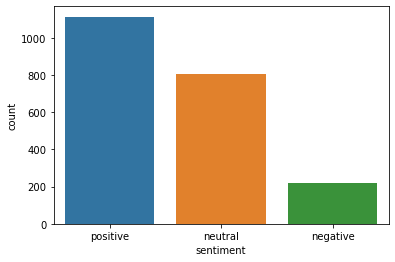

In [5]:
# comparing the ratios of Positive to neural to negative tweets
import seaborn as sns
sns.countplot(x='sentiment', data=Covid_reviews)

# Preprocessing the data

In [6]:
# function to clean the data they remove any unnecessary symbols like html tags, punctuations and numbers, and multiple spaces.
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [7]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [8]:
X = []
sentences = list(Covid_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [9]:
# Double checking the cleaned dataset
X[3]

'there will be positive developments regarding the vaccine in december but the virus will continue in the calendar with the vaccines covid vaccine trumpvsbiden corona trumpcovid healthylifestyle health healthandsafety astrology breakingnews now'

In [10]:
y = Covid_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [13]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [14]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('C:/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [15]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# building  the first neural network (Densely connected neural network)

In [16]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          612600    
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10001     
Total params: 622,601
Trainable params: 10,001
Non-trainable params: 612,600
_________________________________________________________________
None


In [18]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
11/11 [==============================] - 0s 16ms/step - loss: 0.6797 - acc: 0.5568 - val_loss: 0.6401 - val_acc: 0.6433
Epoch 2/6
11/11 [==============================] - 0s 4ms/step - loss: 0.5935 - acc: 0.6740 - val_loss: 0.6247 - val_acc: 0.6520
Epoch 3/6
11/11 [==============================] - 0s 5ms/step - loss: 0.5431 - acc: 0.7275 - val_loss: 0.6027 - val_acc: 0.6930
Epoch 4/6
11/11 [==============================] - 0s 4ms/step - loss: 0.5006 - acc: 0.7802 - val_loss: 0.5897 - val_acc: 0.7018
Epoch 5/6
11/11 [==============================] - 0s 7ms/step - loss: 0.4685 - acc: 0.8117 - val_loss: 0.5787 - val_acc: 0.7135
Epoch 6/6
11/11 [==============================] - 0s 4ms/step - loss: 0.4413 - acc: 0.8300 - val_loss: 0.5694 - val_acc: 0.7047


In [19]:
score = model.evaluate(X_test, y_test, verbose=1)

14/14 [==============================] - 0s 1ms/step - loss: 0.5862 - acc: 0.6768


In [20]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.586188018321991
Test Accuracy: 0.6768149733543396


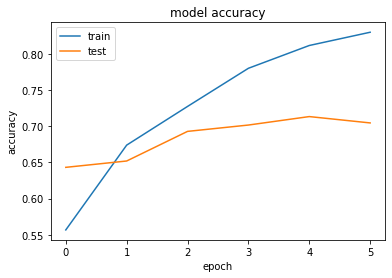

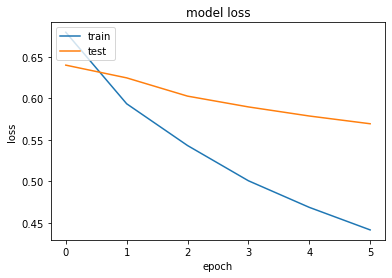

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# building  the Second neural network (Convolutional Neural Network CNN)

In [22]:
from keras.layers.convolutional import Conv1D    
from keras.models import Sequential    
from keras.optimizers import Adam   
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [23]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          612600    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 676,857
Trainable params: 64,257
Non-trainable params: 612,600
_________________________________________________________________
None


In [24]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
11/11 [==============================] - 0s 37ms/step - loss: 0.6690 - acc: 0.5905 - val_loss: 0.6207 - val_acc: 0.6754
Epoch 2/6
11/11 [==============================] - 0s 28ms/step - loss: 0.5319 - acc: 0.7597 - val_loss: 0.5779 - val_acc: 0.7164
Epoch 3/6
11/11 [==============================] - 0s 27ms/step - loss: 0.4491 - acc: 0.8366 - val_loss: 0.5579 - val_acc: 0.7281
Epoch 4/6
11/11 [==============================] - 0s 25ms/step - loss: 0.3979 - acc: 0.8879 - val_loss: 0.5269 - val_acc: 0.7602
Epoch 5/6
11/11 [==============================] - 0s 29ms/step - loss: 0.3460 - acc: 0.9355 - val_loss: 0.5028 - val_acc: 0.7836
Epoch 6/6
14/14 [==============================] - 0s 3ms/step - loss: 0.4568 - acc: 0.8080


In [25]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.4567773640155792
Test Accuracy: 0.8079625368118286


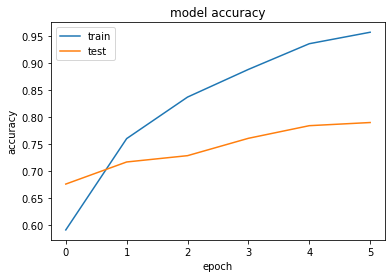

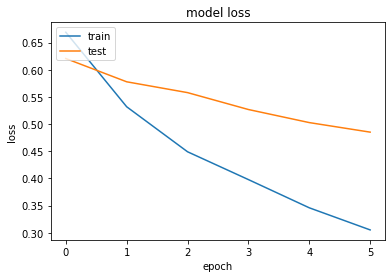

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# building  the Third neural network (Long Short Term Memory Network LSTM)

In [27]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [28]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          612600    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 729,977
Trainable params: 117,377
Non-trainable params: 612,600
_________________________________________________________________
None


In [29]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
11/11 [==============================] - 2s 172ms/step - loss: 0.6926 - acc: 0.5187 - val_loss: 0.6934 - val_acc: 0.5058
Epoch 2/6
11/11 [==============================] - 1s 105ms/step - loss: 0.6902 - acc: 0.5209 - val_loss: 0.6912 - val_acc: 0.5058
Epoch 3/6
11/11 [==============================] - 1s 105ms/step - loss: 0.6837 - acc: 0.5714 - val_loss: 0.6930 - val_acc: 0.4942
Epoch 4/6
11/11 [==============================] - 1s 101ms/step - loss: 0.6946 - acc: 0.4806 - val_loss: 0.6935 - val_acc: 0.4942
Epoch 5/6
11/11 [==============================] - 1s 100ms/step - loss: 0.6933 - acc: 0.5004 - val_loss: 0.6931 - val_acc: 0.5058
Epoch 6/6
14/14 [==============================] - 0s 18ms/step - loss: 0.6911 - acc: 0.5363


In [30]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6911057233810425
Test Accuracy: 0.5362997651100159


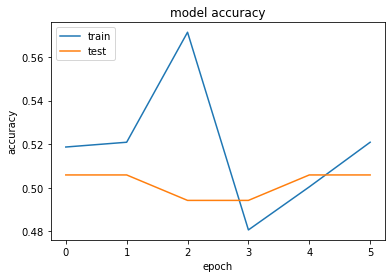

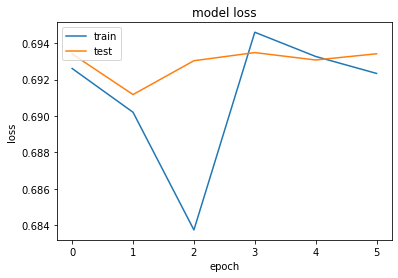

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Machine Learning Classifiers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score


df1 = pd.read_csv("saved_tweets_totalclean.csv")
#Removing non-relevant variables
df1=df1.drop(columns=['user','location','date','Unnamed: 0'],axis=1) 
df1.sentiment.replace(('positive', 'negative','neutral'), (1,2,3), inplace=True)
#defining target varibale
df_target=df1[['sentiment']].values
df_var=df1.drop(columns=['sentiment'],axis=1).values
df1.head() 






,full_text,sentiment
0,Thanks for having us back on your show to disc...,1
1,""" : For Whom The Bell Tolls?""",3
2,I am not sure i fully agree with this and I kn...,1
3,Israeli to be tested in humans.,3
4,Democratic presidential nominee Joe Biden pled...,1


In [2]:
#splitting dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(df_var, df_target, test_size = 0.25, random_state = 0)
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train.ravel())
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
X_train = vectoriser.transform(X_train.ravel())
X_test  = vectoriser.transform(X_test.ravel())
print('Data Transformed.')

Vectoriser fitted.
No. of feature_words:  33092
Data Transformed.


              precision    recall  f1-score   support

           1       0.84      0.95      0.89       560
           2       0.91      0.73      0.81       158
           3       0.88      0.76      0.82       335

    accuracy                           0.86      1053
   macro avg       0.87      0.81      0.84      1053
weighted avg       0.86      0.86      0.85      1053

Your Model Accuracy is 0.8566001899335233


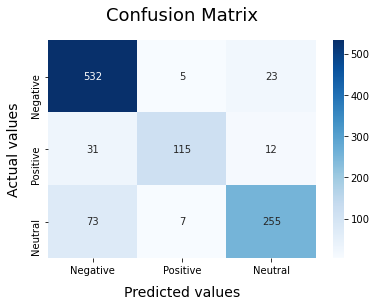

In [3]:

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test) 

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive','Neutral']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    score=accuracy_score(y_test,y_pred) 
    print("Your Model Accuracy is", score)
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix,  cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories,annot=True)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
# SVM classifer
SVCmodel = svm.LinearSVC(random_state=10 ,C=150,tol=1e-5, max_iter=10000 )  
SVCmodel.fit(X_train, y_train.ravel()) 
model_Evaluate(SVCmodel)  





              precision    recall  f1-score   support

           1       0.90      0.90      0.90       560
           2       0.88      0.75      0.81       158
           3       0.81      0.87      0.83       335

    accuracy                           0.87      1053
   macro avg       0.86      0.84      0.85      1053
weighted avg       0.87      0.87      0.86      1053

Your Model Accuracy is 0.8651471984805318


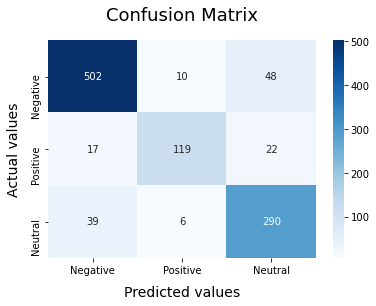

In [4]:
#  Decision Tree classifer ENTROPY
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 60, min_samples_leaf =1,min_samples_split=2)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
model_Evaluate(clf)  

              precision    recall  f1-score   support

           1       0.81      0.88      0.84       560
           2       0.82      0.58      0.68       158
           3       0.74      0.74      0.74       335

    accuracy                           0.79      1053
   macro avg       0.79      0.73      0.75      1053
weighted avg       0.79      0.79      0.78      1053

Your Model Accuracy is 0.7882241215574549


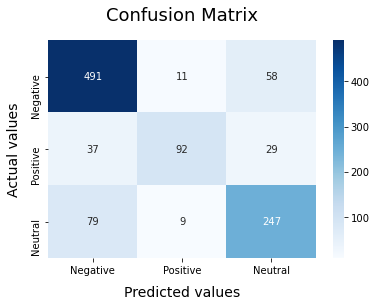

In [6]:
#  Decision Tree classifer GINI
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=40, min_samples_leaf=1,min_samples_split=2) 
  

clf_gini.fit(X_train, y_train) 

model_Evaluate(clf_gini)   

# Code to get  vader score  for tweets and create as csv file

In [8]:
#this script will create a file ('saved_tweets_vaderscore.csv')  which will assign vader score to the input file which has tweets 

import pandas as pd 
import numpy as np 
%matplotlib inline 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()
df = pd.read_csv("saved_tweets_without_sentiment.csv") 
#df1=df.drop(columns=['user','location','date','Unnamed: 0'],axis=1)


i=0 #counter

compval1 = [ ]  #empty list to hold our computed 'compound' VADER scores


while (i<len(df1)):

    k = analyser.polarity_scores(df1.iloc[i]['full_text'])
    compval1.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage

compval1 = np.array(compval1)

len(compval1)

df1['VADER_score'] = compval1
df1.head(20)





,full_text,sentiment,VADER_score
0,Thanks for having us back on your show to disc...,1,0.7430
1,""" : For Whom The Bell Tolls?""",3,0.0000
2,I am not sure i fully agree with this and I kn...,1,-0.1252
3,Israeli to be tested in humans.,3,0.0000
4,Democratic presidential nominee Joe Biden pled...,1,0.5106
5,UK : selected by CEPI to test vaccines globally,3,0.0000
6,"This year's MMS Interim Meeting Ethics Forum, ...",1,0.6597
7,police report individuals and establishments f...,3,-0.5267
8,Woo hoo!,3,0.5255
9,$PETV A low float Biotech thats ahead of the C...,3,-0.2732


In [9]:

#Assigning score categories and logic
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(df1)): 
    if ((df1.iloc[i]['VADER_score'] >= 0.7)): 
        predicted_value.append('positive')
        i = i+1
    elif ((df1.iloc[i]['VADER_score'] > 0) & (df1.iloc[i]['VADER_score'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((df1.iloc[i]['VADER_score'] <= 0)):
        predicted_value.append('negative')
        i = i+1 
df1['predicted_sentiment'] = predicted_value    
len(df1['predicted_sentiment'])  
df1.head(20) 



,full_text,sentiment,VADER_score,predicted_sentiment
0,Thanks for having us back on your show to disc...,1,0.7430,positive
1,""" : For Whom The Bell Tolls?""",3,0.0000,negative
2,I am not sure i fully agree with this and I kn...,1,-0.1252,negative
3,Israeli to be tested in humans.,3,0.0000,negative
4,Democratic presidential nominee Joe Biden pled...,1,0.5106,neutral
5,UK : selected by CEPI to test vaccines globally,3,0.0000,negative
6,"This year's MMS Interim Meeting Ethics Forum, ...",1,0.6597,neutral
7,police report individuals and establishments f...,3,-0.5267,negative
8,Woo hoo!,3,0.5255,neutral
9,$PETV A low float Biotech thats ahead of the C...,3,-0.2732,negative


In [10]:
df1.to_csv('saved_tweets_vaderscore.csv')  

# Code to train  classifiers using  tweets tagged by vader sentiment analyzer


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score


df1 = pd.read_csv("saved_tweets_vaderscore.csv")

#Removing non-relevant variables
df1=df1.drop(columns=['VADER_score','Unnamed: 0','sentiment'],axis=1)

df1.predicted_sentiment.replace(('positive', 'negative','neutral'), (1,2,3), inplace=True)

#defining target varibale
df_target=df1[['predicted_sentiment']].values
df_var=df1.drop(columns=['predicted_sentiment'],axis=1).values

df1.head() 
#splitting dataset into training and testing 






,full_text,predicted_sentiment
0,Thanks for having us back on your show to disc...,1
1,""" : For Whom The Bell Tolls?""",2
2,I am not sure i fully agree with this and I kn...,2
3,Israeli to be tested in humans.,2
4,Democratic presidential nominee Joe Biden pled...,3


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_var, df_target, test_size = 0.3, random_state = 0)

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train.ravel())
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
X_train = vectoriser.transform(X_train.ravel())
X_test  = vectoriser.transform(X_test.ravel())
print('Data Transformed.')



Vectoriser fitted.
No. of feature_words:  32065
Data Transformed.


              precision    recall  f1-score   support

           1       0.82      0.77      0.80       152
           2       0.93      0.84      0.88       585
           3       0.79      0.89      0.84       527

    accuracy                           0.85      1264
   macro avg       0.85      0.83      0.84      1264
weighted avg       0.86      0.85      0.85      1264

Your Model Accuracy is 0.8536392405063291


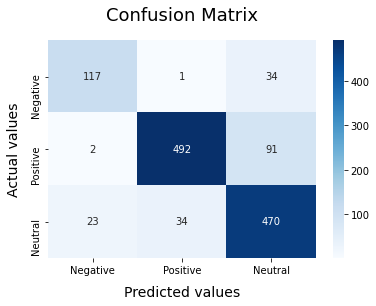

In [18]:

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive','Neutral']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    score=accuracy_score(y_test,y_pred) 
    print("Your Model Accuracy is", score)
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix,  cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories,annot=True)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
SVCmodel = svm.LinearSVC(random_state=20 ,C=80,tol=1e-5,max_iter=10000) 
SVCmodel.fit(X_train, y_train.ravel())
model_Evaluate(SVCmodel)  




              precision    recall  f1-score   support

           1       0.85      0.76      0.81       152
           2       0.85      0.83      0.84       585
           3       0.78      0.82      0.80       527

    accuracy                           0.82      1264
   macro avg       0.83      0.80      0.81      1264
weighted avg       0.82      0.82      0.82      1264

Your Model Accuracy is 0.8164556962025317


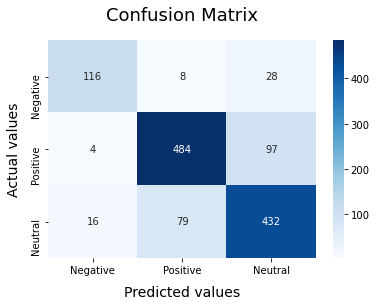

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 60, min_samples_leaf =1,min_samples_split=2)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
model_Evaluate(clf)  

              precision    recall  f1-score   support

           1       0.77      0.76      0.77       152
           2       0.85      0.82      0.84       585
           3       0.78      0.81      0.80       527

    accuracy                           0.81      1264
   macro avg       0.80      0.80      0.80      1264
weighted avg       0.81      0.81      0.81      1264

Your Model Accuracy is 0.8109177215189873


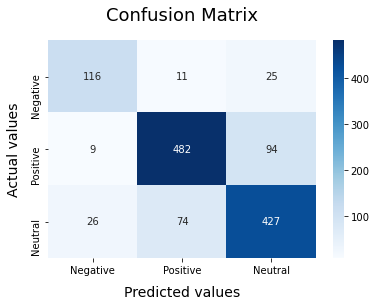

In [20]:
# DecisionTree classifier 
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=100, min_samples_leaf=1,min_samples_split=2) 
 
clf_gini.fit(X_train, y_train) 

model_Evaluate(clf_gini)  

# Code to create graphs 

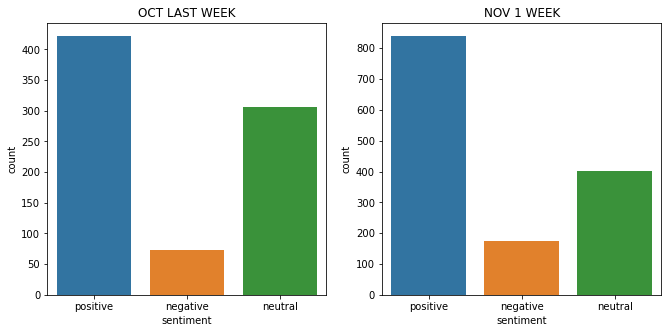

In [22]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(11,5))


data1 = pd.read_csv('saved_tweets_28octfull.csv')
data2 = pd.read_csv('saved_tweets_6nov.csv')

plt.subplot(1,2,1)
plt.title('OCT LAST WEEK')
ax=sns.countplot(x ='sentiment',data = data1) 
plt.subplot(1,2,2)
plt.title('NOV 1 WEEK')
sns.countplot(x ='sentiment',data = data2)



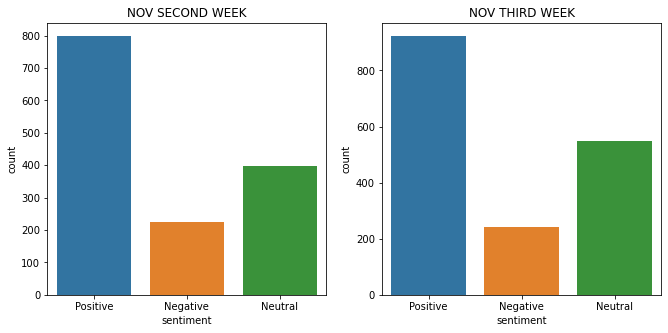

In [23]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=True, figsize=(11,5))


data1 = pd.read_csv('saved_tweets_14nov.csv')
data2 = pd.read_csv('saved_tweets_23nov.csv')

plt.subplot(1,2,1)
plt.title('NOV SECOND WEEK')
ax=sns.countplot(x ='sentiment',data = data1) 
plt.subplot(1,2,2)
plt.title('NOV THIRD WEEK')
sns.countplot(x ='sentiment',data = data2)






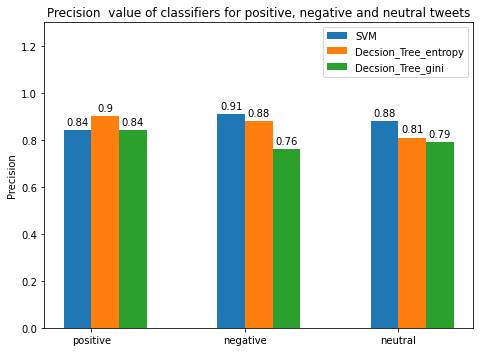

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['positive', 'negative', 'neutral']
SVM = [0.84,0.91,0.88] 
Decsion_Tree_entropy = [0.90,0.88,0.81]
Decsion_Tree_gini =[0.84,0.76,0.79]
x = np.arange(len(labels))# the label locations
width = 0.18  # the width of the bars

fig, ax = plt.subplots(figsize=(7,5),sharex=False, sharey=False, squeeze=True) 
rects1 = ax.bar(x - width/2, SVM, width, label='SVM')
rects2 = ax.bar(x + width/2, Decsion_Tree_entropy, width, label='Decsion_Tree_entropy')
rects3 = ax.bar(x + width/2+width/2+width/2, Decsion_Tree_gini, width, label='Decsion_Tree_gini')
ax.set_ylim(0,1.3)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision') 
ax.set_title('Precision  value of classifiers for positive, negative and neutral tweets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc ="upper right")


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2 , height),
                    xytext=(0,3),textcoords="offset points", ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3) 

fig.tight_layout()

plt.show()